[This datasets](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference (Cortez et al., 2009). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# Import Libraries
First, we import necessary libraries, such as:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import The Data

In [19]:
red_wine = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Quick Look at The Data

In [20]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Dataset's info

In [21]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Dataset's descriptive statistics

In [22]:
red_wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Check for missing data

In [23]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

- Correlation of all the train features with target variable

In [24]:
(red_wine.corr()**2)['quality'].sort_values(ascending = False)[1:]

alcohol                 0.226734
volatile acidity        0.152535
sulphates               0.063200
citric acid             0.051245
total sulfur dioxide    0.034262
density                 0.030597
chlorides               0.016617
fixed acidity           0.015389
pH                      0.003333
free sulfur dioxide     0.002566
residual sugar          0.000189
Name: quality, dtype: float64

Plot some top of the most correlated one.

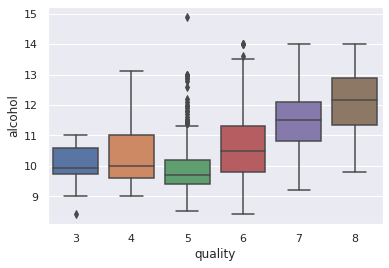

In [25]:
sns.boxplot(red_wine['quality'], red_wine['alcohol']);

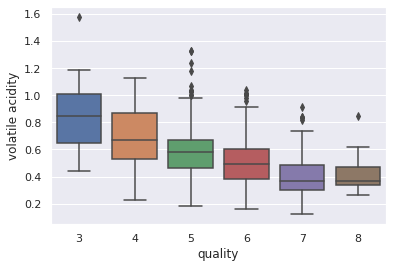

In [26]:
sns.boxplot(red_wine['quality'], red_wine['volatile acidity']);

Let's see the distribution of quality feature by plotting it.

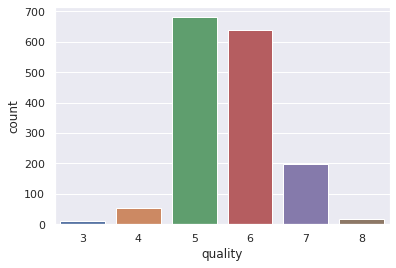

In [27]:
sns.countplot(red_wine['quality'], data=red_wine);

In the real world, people often 'take it simple' by just classified red wine into 2 qualities, good and bad. I will try the same approach by transforming it to binary labels. Let's say wine with quality > 6 is good and the remainder is bad.

In [28]:
labels = ['bad', 'good']
bins = [2, 6, 8]
red_wine['quality'] = pd.cut(red_wine['quality'], bins=bins, labels=labels)

In [29]:
red_wine = pd.get_dummies(red_wine, drop_first=True)
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Creating A Model
We begin by splitting data into two subsets: for training data and for testing data.

In [30]:
from sklearn.model_selection import train_test_split

y = red_wine['quality_good']
X = red_wine.drop(['quality_good'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Then, we standarize the train and the test datasets

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
print('X_train_scaled mean : ', X_train.mean(axis=0))
print('X_train_scaled std  : ', X_train.std(axis=0))

X_test = scaler.transform(X_test)
print('')
print('X_test_scaled mean : ', X_test.mean(axis=0))
print('X_test_scaled std  : ', X_test.std(axis=0))

X_train_scaled mean :  [-2.81451952e-16 -1.92572388e-16 -4.93775355e-17  2.65404253e-16
  2.33308855e-16  0.00000000e+00 -9.87550710e-18 -1.13605365e-14
  3.50580502e-16  3.35150022e-16  7.82633938e-16]
X_train_scaled std  :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

X_test_scaled mean :  [-0.06993313 -0.09650474  0.02502415 -0.06890154  0.08349466  0.02378321
  0.00024572 -0.03097825  0.00461156  0.11650666 -0.03174487]
X_test_scaled std  :  [0.93033989 1.02021541 0.9678853  0.97971602 1.41152659 1.08058636
 1.08590763 0.96012391 1.05688527 1.1821606  0.94855688]


Model training : Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [33]:
#search grid for optimal parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100,1000],
              'max_depth': [None,10,100],
              'max_features': ['auto','sqrt','log2']}

grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000}
0.905485385210995


In [34]:
from sklearn.metrics import mean_squared_error, classification_report

#use the best model
model = grid.best_estimator_

#make a prediction
y_predict = model.predict(X_test)

#calculate Mean Squared Error and classification report
print('MSE : ', mean_squared_error(y_test, y_predict))
print(classification_report(y_test,y_predict))

MSE :  0.0625
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       139
           1       0.87      0.62      0.72        21

    accuracy                           0.94       160
   macro avg       0.91      0.80      0.84       160
weighted avg       0.93      0.94      0.93       160

